# Exercise 2

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\inpd}[2]{\left\langle #1,#2 \right\rangle}$

In this exercise we will solve a Binary Classification problem by using Logistic Regression which involves estimating a function $ f_{\theta} : \R^n \to [0, 1] $ parameterized by $ \theta \in \R^N $ which fits the given training dataset $ \{ (x^{(i)}, y^{(i)}) \in \R^n \times \{0, 1\} : 1 \leq i \leq M \} $ reasonably well. In particular, we solve the following optimization problem:

$$ \min_{\theta \in \R^N} J(\theta), \quad J(\theta) = -\frac{1}{M} \sum_{i=1}^M\left(y^{(i)}\log(f_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1 - f_{\theta}(x^{(i)})) \right) \,. $$

To increase the complexity of our model, we can perform some feature transformation $p : \R^n \to \R^N$ on our given input $x\in\R^n$ to obtain $a = p(x)$. Polynomial Feature Tranformation, Kernel Method and Pre-trained Neural Network are some examples of feature transformation. Given an input $x\in\R^n$, our model makes the predictions by:

$$ f_{\theta} (x) = h_{\theta} (p(x)) \,, $$

where $ h_{\theta} : \R^N \to [0, 1] $ is defined by:

$$ h_{\theta} (a) = \frac{1}{1 + e^{-\inpd{\theta}{a}}} \,. $$

We now load our dataset and assign $x$ and $y$ to the variables *features* and *targets* respectively. We consider the dataset with $n=2$ so that we can graphically visualize the performance of the classifier.

In [1]:
# Import the packages. Don't use any other packages.
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
data = np.loadtxt("dataset")
features = data[:, :-1]
targets = data[:, -1]

### Visualizing the Dataset

In the code above the variables *features* and *targets* denote the feature matrix $ X \in \R^{M \times n}$ and target vector $ y \in \R^M $ (each row of $X$ and $y$ correspond to $x^{(i)}$ and $y^{(i)}$ in the dataset). We will first plot the dataset to have a better understanding of what it looks like and what we may have to do. Plot second column of variable *features* (on y-axis) against its first column (on x-axis). The variables $x$ with $y=0$ should appear as a red dot ('r.') while those with $y=1$ should appear as a blue cross ('bx').

#### Task 1 - Plot the dataset (2 points).

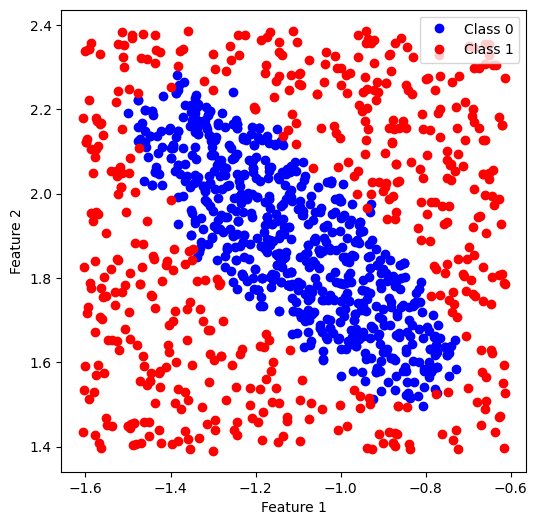

In [2]:
def plot_dataset(ax):
    class_0 = features[targets == 0]
    class_1 = features[targets == 1]

    ax.plot(class_0[:, 0], class_0[:, 1], 'o', color='blue', label='Class 0')
    ax.plot(class_1[:, 0], class_1[:, 1], 'o', color='red', label='Class 1')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

fig, ax = plt.subplots(figsize=(6, 6))
plot_dataset(ax)

### Polynomial Feature Transformation

We now perform polynomial feature transform $ p_d : \R^n \to \R^N $ upto a certain degree $d$ to obtain $ a = p_d(x) $. This will give us a transformed feature matrix $ A \in \R^{M \times N} $ where the $i^{\mathrm{th}}$ row of $ A $, denoted by $ a^{(i)} $ corresponds to the polynomial features of $ x^{(i)} $. For our case, we will restrict $d$ to $4$ and generate every row of $A$ in the following order:
$$ a = (1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3, x_1^4, x_1^3x_2, x_1^2x_2^2, x_1x_2^3, x_2^4) \,. $$

#### Task 2 - Complete the code below (2 points).
The function below should take in $X$ and return $A$.

In [3]:
from itertools import combinations_with_replacement

def poly_transform(features, degree=4):
    n_features = features.shape[1]
    combinations = combinations_with_replacement(range(n_features), degree)
    
    # Compute polynomial features for each combination
    poly_features = np.column_stack([
        np.prod(features[:, comb], axis=1) for comb in combinations
    ])
    
    return poly_features

## Implementation

We will implement our classifier as Class *LogisticRegression*. Read the following instructions carefully and fill in the missing code below.
* *\__init__*: The inputs *features* and *targets* correspond to $A\in\R^{M\times N}$ (**NOT** $X\in\R^{M\times n}$) and $y\in\R^M$ respectively. In this function, you are asked to compute the expression for Lipschitz Constant $L$ (or an upper bound on it) of $\nabla J$.

#### Task 3 - Compute the Lipschitz Constant of $\nabla J$ and complete the code in *\__init__* function (6 points).

* *train*: In this function, you are required to run the gradient descent algorithm for *max\_iters* number of iterations and update *self.weights* variable. You need to print the training accuracy after every 10000 iterations. Finally, you need to stop the algorithm when the l2 norm of gradient of the loss function $\nabla J (\theta)$ goes below *tol*.

#### Task 4 - Complete the code for *train* function (4 points).

* *predict*: This function takes in as input the *features* variable ($ A_n \in \R^{L\times N} $, this matrix can come from any seen or unseen dataset through polynomial feature transform). You are required to return the vector $ t \in R^L $ where the $i^{\mathrm{th}}$ element of $t$ is given by $t^{(i)} = h_{\theta} (a_n^{(i)})$.

#### Task 5- Complete the code for *predict* function (4 points).

* *loss*: This function takes in as input the *features* ($ A_n \in \R^{L\times N} $) and *targets* ($ y_n \in \R^{L} $) variables. You are requried to return the loss $ J(\theta) $ corresponding to the given dataset $ A_n, y_n $ (Replace $f_{\theta} (x^{(i)})$ by $h_{\theta} (a_n^{(i)})$ in the expression above).

#### Task 6- Complete the code for *loss* function (4 points).

* *grad\_loss*: This function takes in as input the *features* ($ A_n \in \R^{L\times N} $) and *targets* ($ y_n \in \R^{L} $) variables. You are requried to return the gradient of the loss $ \nabla J(\theta) $ corresponding to the given dataset $ A_n, y_n $.

#### Task 7- Complete the code for *grad\_loss* function (4 points).

* *accuracy*: This function takes in as input the *features* ($ A_n \in \R^{L\times N} $) and *targets* ($ y_n \in \R^{L} $) variables. You are requried to return the percentage accuracy of the classifier, i.e., the ratio of correctly predicted samples to the total samples in percentage.

#### Task 8- Complete the code for *accuracy* function (4 points).


In [4]:
class LogisticRegression:
    def __init__(self, features, targets):
        self.features = features                                # A Matrix
        self.targets = targets                                  # y vector
        self.weights = 0.001 * np.random.randn(features.shape[1]) # theta vector
        
        # Compute Lipschitz constant L
        A_T_A = features.T @ features
        self.lip_const = 0.25 * np.linalg.norm(A_T_A, ord=2)  # Largest eigenvalue of A^T A
    
    def train(self, max_iters=100, stepsize=None, tol=1e-15):
        if stepsize is None:
            stepsize = 1 / self.lip_const
        for i in range(max_iters):
            grad = self.grad_loss()
            grad_norm = np.linalg.norm(grad)
            if grad_norm < tol:
                print(f"Converged at iteration {i}")
                break
            self.weights -= stepsize * grad
            if i % 10000 == 0:
                print(f"Iteration {i}, Accuracy: {self.accuracy():.2f}%")
    
    def predict(self, features=None):
        if features is None:
            features = self.features
        logits = features @ self.weights
        return 1 / (1 + np.exp(-logits))  # Sigmoid function
    
    def loss(self, features=None, targets=None):
        if features is None:
            features = self.features
        if targets is None:
            targets = self.targets
        predictions = self.predict(features)
        return -np.mean(targets * np.log(predictions + 1e-15) + (1 - targets) * np.log(1 - predictions + 1e-15))
    
    def grad_loss(self, features=None, targets=None):
        if features is None:
            features = self.features
        if targets is None:
            targets = self.targets
        predictions = self.predict(features)
        return features.T @ (predictions - targets) / features.shape[0]
    
    def accuracy(self, features=None, targets=None):
        if features is None:
            features = self.features
        if targets is None:
            targets = self.targets
        predictions = self.predict(features) >= 0.5
        return np.mean(predictions == targets) * 100

## Testing our Implementation

We will now train our model by running it for $200,000$ iterations and plot the decision boundary.

In [5]:
normalized_poly = poly_transform(features)
logreg = LogisticRegression(normalized_poly, targets)
logreg.train(max_iters=200000)

Iteration 0, Accuracy: 27.58%
Iteration 10000, Accuracy: 58.33%
Iteration 20000, Accuracy: 58.33%
Iteration 30000, Accuracy: 60.50%
Iteration 40000, Accuracy: 63.08%
Iteration 50000, Accuracy: 64.75%
Iteration 60000, Accuracy: 65.92%
Iteration 70000, Accuracy: 68.17%
Iteration 80000, Accuracy: 69.25%
Iteration 90000, Accuracy: 70.58%
Iteration 100000, Accuracy: 71.67%
Iteration 110000, Accuracy: 72.42%
Iteration 120000, Accuracy: 72.75%
Iteration 130000, Accuracy: 73.33%
Iteration 140000, Accuracy: 74.92%
Iteration 150000, Accuracy: 75.67%
Iteration 160000, Accuracy: 76.33%
Iteration 170000, Accuracy: 76.83%
Iteration 180000, Accuracy: 77.33%
Iteration 190000, Accuracy: 77.75%


In [6]:
def plot_boundary(ax):
    x1 = np.linspace(-1.6, -0.6, 101)
    x2 = np.linspace(1.4, 2.4, 101)
    X1, X2 = np.meshgrid(x1, x2)     
    feat = np.stack((X1.reshape(-1), X2.reshape(-1)), axis=1)
    norm_poly = poly_transform(feat)
    pred = logreg.predict(norm_poly).reshape(X1.shape)
    ax.contour(X1, X2, pred, levels=[0.5])

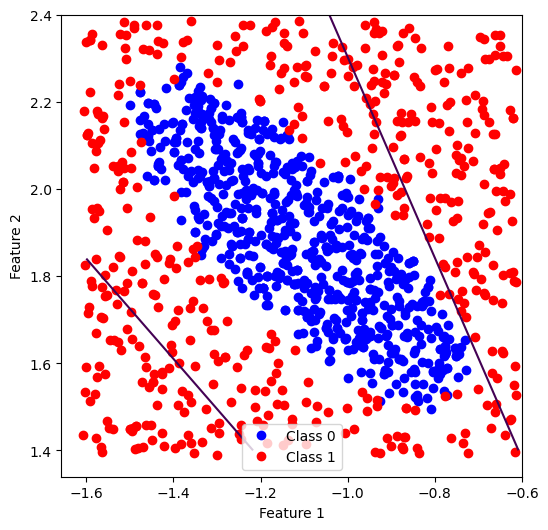

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_dataset(ax)
plot_boundary(ax)
ax.set_aspect("equal")